hay algunas celdas donde muestro lo que etsá mal y luego lo que está bien (no quería borrarlo para recordar el fallo luego)

# Análisis Descriptivo de la Gestión del negocio: Influenciadores clave

Un análisis descriptivo es un tipo de análisis que se utiliza para explorar y describir los datos, identificar patrones y tendencias y para generar estadísticas y visualizaciones que permitan entender los datos de manera más clara. En este caso, se utilizan las técnicas de correlación y pruebas estadísticas para identificar las variables que influyen en las ventas de la empresa ***AdventureWorks***.

Un análisis descriptivo no pretende hacer predicciones o recomendaciones, sino simplemente brindar una descripción más detallada de los datos y su relación entre ellos.

## Carga de las librerías de python necesarias

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

## Extracción de los datos desde SQL Server

In [58]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=BALRODJJ;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
input_query = '''select
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_data = pd.read_sql(input_query, conn_str)

C:\Users\juanj\AppData\Local\Temp\ipykernel_16868\164933949.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


### - Explicar linea por linea la query utilizada arriba

In [59]:
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Explicar tabla de arriba, por ejemplo: ¿Que significa cada columna?

En la tabla proporcionada se analizan, por fecha, las ventas por mes de cada año. En la columna ventas se encuentra el sumatorio de la cantidad ($) vendida, mientras que en "cantidad" muestra el número de items vendidos ese mes. Y en "transacciones" vemos el número de ventas que se realizaron entre las cuales se dividen esos items. 

Es decir, por ejemplo: en MARZO hubo una ganancia (columna "ventas") de 400 euros, en 4 transacciones, donde la cantidad vendida fue: 50€ (en los items A,B,C), 100 euros (transacción 2 gastados en el item D), 1€ (transacción 3 en el item E) y 149€ (en la transacción 4 de los items F,G,H,I,J,K). Es decir en "cantidad del mes MARZO hubo una ganancia de 400€, se hicieron 4 transacciones y la cantidad de items vendidos fue 11 (A,B,C,D,E,F,G,H,I,J,K).

el monto promedio (indica la cantidad promedio de cada transacción)- y la "cantidad promedio" hace referencia a la cantidad de items que se vendieron por cada transacción de media. En el index 0, por ejemplo, comprobamos que 19(la media de items) x 43(transacciones) es igual a la cantidad de items vendidos 817 (825 en realidad, es promedio).

También vemos cuántos vendedores se encargaron de esas transacciones, la variedad de items que vendieron y el numero de clientes diferentes que compraron.

### - Aproximar a dos decimales el monto_promedio

In [60]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              38 non-null     object 
 1   ventas             38 non-null     float64
 2   cantidad           38 non-null     int64  
 3   transacciones      38 non-null     int64  
 4   monto_promedio     38 non-null     float64
 5   cantidad_promedio  38 non-null     int64  
 6   variedad           38 non-null     int64  
 7   clientes           38 non-null     int64  
 8   vendedores         38 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB


In [61]:
#no me permite convertir las fechas a flotantes, asi que voy a eliminar esa columna
v3 = sales_data.drop(columns=["fecha"])
v33= v3.astype(float)
v33

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,8.094970e+06,825.0,43.0,188255.1210,19.0,47.0,43.0,9.0
1,5.070965e+05,141.0,141.0,3596.4288,1.0,21.0,141.0,1.0
2,2.608142e+07,2209.0,231.0,112906.5844,9.0,51.0,231.0,10.0
3,3.800996e+07,2904.0,250.0,152039.8384,11.0,59.0,250.0,10.0
4,5.547916e+05,157.0,157.0,3533.7045,1.0,22.0,157.0,1.0
5,8.573987e+07,5382.0,327.0,262201.4520,16.0,60.0,327.0,10.0
6,8.153130e+05,230.0,230.0,3544.8391,1.0,23.0,230.0,1.0
7,1.098031e+07,1040.0,228.0,48159.2465,4.0,51.0,228.0,9.0
8,5.743832e+07,3967.0,336.0,170947.3956,11.0,51.0,336.0,10.0
9,1.792551e+07,1442.0,219.0,81851.6572,6.0,58.0,219.0,10.0


In [62]:
v33.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ventas             38 non-null     float64
 1   cantidad           38 non-null     float64
 2   transacciones      38 non-null     float64
 3   monto_promedio     38 non-null     float64
 4   cantidad_promedio  38 non-null     float64
 5   variedad           38 non-null     float64
 6   clientes           38 non-null     float64
 7   vendedores         38 non-null     float64
dtypes: float64(8)
memory usage: 2.5 KB


### - Efectuar la misma conexión a la base de datos usando SQLAlchemy, usar también la misma query.

In [63]:
from sqlalchemy import create_engine
import pandas as pd
 
# Crear la cadena de conexión
engine=create_engine('mssql+pyodbc://BALRODJJ/AdventureWorks2019?driver=SQL+Server&trusted_connection=yes')
 
input_query = '''select
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''
 
ventas3 = pd.read_sql(input_query, engine)
 
# Mostrar los resultados
print(ventas3)

      fecha        ventas  cantidad  transacciones  monto_promedio  \
0    2011-5  8.094970e+06       825             43     188255.1210   
1    2011-6  5.070965e+05       141            141       3596.4288   
2    2011-7  2.608142e+07      2209            231     112906.5844   
3    2011-8  3.800996e+07      2904            250     152039.8384   
4    2011-9  5.547916e+05       157            157       3533.7045   
5   2011-10  8.573987e+07      5382            327     262201.4520   
6   2011-11  8.153130e+05       230            230       3544.8391   
7   2011-12  1.098031e+07      1040            228      48159.2465   
8    2012-1  5.743832e+07      3967            336     170947.3956   
9    2012-2  1.792551e+07      1442            219      81851.6572   
10   2012-3  4.927356e+07      3184            304     162084.0672   
11   2012-4  2.606104e+07      2405            269      96881.1956   
12   2012-5  1.192323e+08      7723            293     406936.2045   
13   2012-6  1.68746

## Exploración del dataset extraído

### - Muestre la información general del dataframe

In [64]:
ventas3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              38 non-null     object 
 1   ventas             38 non-null     float64
 2   cantidad           38 non-null     int64  
 3   transacciones      38 non-null     int64  
 4   monto_promedio     38 non-null     float64
 5   cantidad_promedio  38 non-null     int64  
 6   variedad           38 non-null     int64  
 7   clientes           38 non-null     int64  
 8   vendedores         38 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB


### - Muestre los tipos de datos de cada columna:

In [65]:
tipo=ventas3.dtypes
print(tipo)

fecha                 object
ventas               float64
cantidad               int64
transacciones          int64
monto_promedio       float64
cantidad_promedio      int64
variedad               int64
clientes               int64
vendedores             int64
dtype: object


### - Dimensiones del dataframe (shape)

In [66]:
v31= pd.DataFrame(ventas3)
v31

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


In [67]:
df = pd.DataFrame(ventas3)
print(df.shape)

(38, 9)


### - Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [68]:
ventas3.describe()

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
count,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7.702553e+07,7234.578947,828.026316,147862.879674,11.342105,101.631579,808.842105,11.236842
std,6.051102e+07,5601.450467,796.913149,124012.409608,7.826760,51.404817,769.105536,5.074761
min,1.461499e+05,141.000000,43.000000,155.644100,1.000000,21.000000,43.000000,1.000000
25%,2.606614e+07,2974.000000,287.000000,49202.019475,5.250000,58.250000,287.000000,10.000000
50%,7.756321e+07,5609.000000,384.000000,111793.302500,9.500000,99.500000,384.000000,12.500000
75%,1.215372e+08,10851.750000,1752.000000,259254.022025,17.750000,145.000000,1703.500000,15.750000
max,2.150542e+08,22582.000000,2411.000000,432681.923300,28.000000,196.000000,2350.000000,17.000000


Imprime cuantas ventas se han realizado (count), la media te indica cuál es la cantidad media de ventas, de cantidad de items, de transacciones...
Std indica la desviación estándar,que es una medida estadística que indica la dispersión o variabilidad de un conjunto de datos con respecto a su promedio.
El mínimo de cada columna, los porcentajes y el máximo elemento de cada columna.

### - Imprimir en un objeto tipo Index todas las columnas del dataframe

In [69]:
ventas3.columns

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

In [70]:
columnas = ventas3.columns
print(columnas)

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')


### - Muestre el contenido de las primeras 15 líneas del dataframe

In [71]:
ventas3.head(15)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Muestre las últimas cinco líneas del dataframe

In [72]:
ventas3.tail(5)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
33,2014-2,4.094288e+06,4287,1756,2331.5993,2,109,1713,2
34,2014-3,2.150542e+08,22582,2399,89643.2876,9,173,2342,17
35,2014-4,5.567935e+06,5313,2115,2632.5935,2,108,2058,1
36,2014-5,1.353521e+08,15884,2411,56139.4170,6,166,2350,16
37,2014-6,1.461499e+05,2130,939,155.6441,2,42,898,1


### Calcular el cambio procentual (o incremento porcentual) de las ventas mes a mes. Recordar el ejemplo realizado en clase con las acciones de las 'Big Four' del 2010.

In [42]:
 #ventas = pd.read_bak("AdventureWorks2019.bak") #no lo he podido traer así 

AttributeError: module 'pandas' has no attribute 'read_bak'

In [73]:
returns = ventas3.ventas.pct_change()
returns

0            NaN
1      -0.937357
2      50.432859
3       0.457358
4      -0.985404
5     153.544289
6      -0.990491
7      12.467598
8       4.231030
9      -0.687917
10      1.748795
11     -0.471095
12      3.575117
13      0.415270
14     -0.161913
15     -0.465532
16      0.618089
17     -0.272152
18     -0.553176
19      0.659003
20     -0.307247
21      0.780284
22      0.453498
23     -0.307767
24      0.566522
25      0.529959
26     -0.018710
27     -0.513878
28      0.431549
29      0.022685
30     -0.603520
31      0.463700
32      0.008625
33     -0.948966
34     51.525426
35     -0.974109
36     23.309214
37     -0.998920
Name: ventas, dtype: float64

### - Calcular el promedio de ventas de por trimestre y por año.

In [74]:

fechaexp = ventas3['fecha'].apply(pd.Series)
fechaexp.columns = [f'fecha_{i+1}' for i in fechaexp.columns]

# Concatenate the expanded skills back to the original DataFrame
ventas3 = pd.concat([ventas3.drop(columns='fecha'), fechaexp], axis=1)
print(ventas3.head())


         ventas  cantidad  transacciones  monto_promedio  cantidad_promedio  \
0  8.094970e+06       825             43     188255.1210                 19   
1  5.070965e+05       141            141       3596.4288                  1   
2  2.608142e+07      2209            231     112906.5844                  9   
3  3.800996e+07      2904            250     152039.8384                 11   
4  5.547916e+05       157            157       3533.7045                  1   

   variedad  clientes  vendedores fecha_1  
0        47        43           9  2011-5  
1        21       141           1  2011-6  
2        51       231          10  2011-7  
3        59       250          10  2011-8  
4        22       157           1  2011-9  


In [51]:
ventas3


,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,fecha_1
0,8.094970e+06,825,43,188255.1210,19,47,43,9,2011-5
1,5.070965e+05,141,141,3596.4288,1,21,141,1,2011-6
2,2.608142e+07,2209,231,112906.5844,9,51,231,10,2011-7
3,3.800996e+07,2904,250,152039.8384,11,59,250,10,2011-8
4,5.547916e+05,157,157,3533.7045,1,22,157,1,2011-9
5,8.573987e+07,5382,327,262201.4520,16,60,327,10,2011-10
6,8.153130e+05,230,230,3544.8391,1,23,230,1,2011-11
7,1.098031e+07,1040,228,48159.2465,4,51,228,9,2011-12
8,5.743832e+07,3967,336,170947.3956,11,51,336,10,2012-1
9,1.792551e+07,1442,219,81851.6572,6,58,219,10,2012-2


In [75]:
# Supongamos que tienes un DataFrame llamado ventas3 con una columna "fecha"
# que contiene fechas en formato 'año-mes'

# Divide la columna "fecha" en dos columnas separadas "año" y "mes"
fechaexp = ventas3['fecha_1'].str.split('-', expand=True)
fechaexp.columns = ['año', 'mes']

# Concatena las columnas expandidas de nuevo al DataFrame original
ventas3 = pd.concat([ventas3.drop(columns='fecha_1'), fechaexp], axis=1)

print(ventas3.head())


         ventas  cantidad  transacciones  monto_promedio  cantidad_promedio  \
0  8.094970e+06       825             43     188255.1210                 19   
1  5.070965e+05       141            141       3596.4288                  1   
2  2.608142e+07      2209            231     112906.5844                  9   
3  3.800996e+07      2904            250     152039.8384                 11   
4  5.547916e+05       157            157       3533.7045                  1   

   variedad  clientes  vendedores   año mes  
0        47        43           9  2011   5  
1        21       141           1  2011   6  
2        51       231          10  2011   7  
3        59       250          10  2011   8  
4        22       157           1  2011   9  


In [76]:
ventas3.head (2) #como he cambiado el nombre de fecha a fecha_1 me está dando problemas

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,año,mes
0,8.094970e+06,825,43,188255.1210,19,47,43,9,2011,5
1,5.070965e+05,141,141,3596.4288,1,21,141,1,2011,6


# Supongamos que tienes un DataFrame llamado ventas3 con una columna "fecha"
# que contiene fechas en formato 'año-mes'

# Divide la columna "fecha" en dos columnas separadas "año" y "mes"
fechaexp = ventas3['fecha_1'].str.split('-', expand=True)
fechaexp.columns = ['año', 'mes']

# Concatena las columnas expandidas de nuevo al DataFrame original
ventas3 = pd.concat([ventas3.drop(columns='fecha_1'), fechaexp], axis=1)

print(ventas3.head())


"""¿otra forma? # Supongamos que tienes un DataFrame llamado ventas3 con una columna "fecha"
# que contiene fechas en formato 'año-mes'

# Convierte la columna "fecha" a tipo datetime
ventas3['fecha'] = pd.to_datetime(ventas3['fecha'], format='%Y-%m')

# Crea columnas separadas para "año" y "mes"
ventas3['año'] = ventas3['fecha'].dt.year
ventas3['mes'] = ventas3['fecha'].dt.month

# Elimina la columna original "fecha"
ventas3 = ventas3.drop(columns='fecha')

print(ventas3.head())"""

In [77]:
ventas3

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,año,mes
0,8.094970e+06,825,43,188255.1210,19,47,43,9,2011,5
1,5.070965e+05,141,141,3596.4288,1,21,141,1,2011,6
2,2.608142e+07,2209,231,112906.5844,9,51,231,10,2011,7
3,3.800996e+07,2904,250,152039.8384,11,59,250,10,2011,8
4,5.547916e+05,157,157,3533.7045,1,22,157,1,2011,9
5,8.573987e+07,5382,327,262201.4520,16,60,327,10,2011,10
6,8.153130e+05,230,230,3544.8391,1,23,230,1,2011,11
7,1.098031e+07,1040,228,48159.2465,4,51,228,9,2011,12
8,5.743832e+07,3967,336,170947.3956,11,51,336,10,2012,1
9,1.792551e+07,1442,219,81851.6572,6,58,219,10,2012,2


In [78]:
ventas3.columns

Index(['ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores', 'año',
       'mes'],
      dtype='object')

In [79]:
# Agrupar por trimestre y calcular el promedio de ventas
ventas3['mes'] = pd.to_datetime(ventas3['mes'], format='%m')

ventas3.set_index('mes', inplace=True)  # Establecer la columna "fecha" como índice
promedio_trimestre = ventas3.resample('Q')['ventas'].mean()


# Agrupar por año y calcular el promedio de ventas
promedio_año = ventas3.groupby('año')['ventas'].mean()

print("Promedio de ventas por trimestre:")
print(promedio_trimestre)

print("\nPromedio de ventas por año:")
print(promedio_año)


Promedio de ventas por trimestre:
mes
1900-03-31    7.437788e+07
1900-06-30    7.910205e+07
1900-09-30    9.157602e+07
1900-12-31    6.258472e+07
Freq: QE-DEC, Name: ventas, dtype: float64

Promedio de ventas por año:
año
2011    2.134797e+07
2012    8.106478e+07
2013    1.119140e+08
2014    7.340679e+07
Name: ventas, dtype: float64


C:\Users\juanj\AppData\Local\Temp\ipykernel_16868\1573097020.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  promedio_trimestre = ventas3.resample('Q')['ventas'].mean()


In [80]:
ventas3

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,año
mes,,,,,,,,,
1900-05-01,8.094970e+06,825,43,188255.1210,19,47,43,9,2011
1900-06-01,5.070965e+05,141,141,3596.4288,1,21,141,1,2011
1900-07-01,2.608142e+07,2209,231,112906.5844,9,51,231,10,2011
1900-08-01,3.800996e+07,2904,250,152039.8384,11,59,250,10,2011
1900-09-01,5.547916e+05,157,157,3533.7045,1,22,157,1,2011
1900-10-01,8.573987e+07,5382,327,262201.4520,16,60,327,10,2011
1900-11-01,8.153130e+05,230,230,3544.8391,1,23,230,1,2011
1900-12-01,1.098031e+07,1040,228,48159.2465,4,51,228,9,2011
1900-01-01,5.743832e+07,3967,336,170947.3956,11,51,336,10,2012


## Procesamiento de los datos: Cálculo de la correlación entre las variables

In [81]:
ventas3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1900-05-01 to 1900-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ventas             38 non-null     float64
 1   cantidad           38 non-null     int64  
 2   transacciones      38 non-null     int64  
 3   monto_promedio     38 non-null     float64
 4   cantidad_promedio  38 non-null     int64  
 5   variedad           38 non-null     int64  
 6   clientes           38 non-null     int64  
 7   vendedores         38 non-null     int64  
 8   año                38 non-null     object 
dtypes: float64(2), int64(6), object(1)
memory usage: 3.0+ KB


In [83]:
ventas3['año'] = pd.to_numeric(ventas3['año'], errors='coerce')
return2 = ventas3.pct_change()

correlation = return2.corr()
correlation

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,año
ventas,1.000000,0.968054,0.332506,0.981558,0.957008,0.683074,0.336723,0.658370,-0.073358
cantidad,0.968054,1.000000,0.350359,0.926979,0.982265,0.726374,0.354424,0.593437,-0.037806
transacciones,0.332506,0.350359,1.000000,0.313333,0.312581,0.187342,0.999760,0.181452,0.011159
monto_promedio,0.981558,0.926979,0.313333,1.000000,0.947025,0.726070,0.317777,0.765340,-0.083351
cantidad_promedio,0.957008,0.982265,0.312581,0.947025,1.000000,0.812950,0.317244,0.684285,-0.035106
variedad,0.683074,0.726374,0.187342,0.726070,0.812950,1.000000,0.190119,0.692737,-0.066841
clientes,0.336723,0.354424,0.999760,0.317777,0.317244,0.190119,1.000000,0.184921,0.013972
vendedores,0.658370,0.593437,0.181452,0.765340,0.684285,0.692737,0.184921,1.000000,-0.096320
año,-0.073358,-0.037806,0.011159,-0.083351,-0.035106,-0.066841,0.013972,-0.096320,1.000000


### - Seleccionar solo columnas numéricas del dataframe:

In [ ]:
#lo hice arriba dropping la columna de fehcas.

### - Imprima la nueva dataset con las columnas numéricas

In [84]:
v33

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,8.094970e+06,825.0,43.0,188255.1210,19.0,47.0,43.0,9.0
1,5.070965e+05,141.0,141.0,3596.4288,1.0,21.0,141.0,1.0
2,2.608142e+07,2209.0,231.0,112906.5844,9.0,51.0,231.0,10.0
3,3.800996e+07,2904.0,250.0,152039.8384,11.0,59.0,250.0,10.0
4,5.547916e+05,157.0,157.0,3533.7045,1.0,22.0,157.0,1.0
5,8.573987e+07,5382.0,327.0,262201.4520,16.0,60.0,327.0,10.0
6,8.153130e+05,230.0,230.0,3544.8391,1.0,23.0,230.0,1.0
7,1.098031e+07,1040.0,228.0,48159.2465,4.0,51.0,228.0,9.0
8,5.743832e+07,3967.0,336.0,170947.3956,11.0,51.0,336.0,10.0
9,1.792551e+07,1442.0,219.0,81851.6572,6.0,58.0,219.0,10.0


### - Calcular la correlación, imprima la matriz de correlación.

In [86]:
correlation = v33.corr()
correlation #antes me fucionaba y ahora me dice que numeric_sales_data no está definido.. es por algo que he cambiado abajo..

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
ventas,1.000000,0.905770,0.340578,0.518040,0.560443,0.786085,0.343143,0.756155
cantidad,0.905770,1.000000,0.695079,0.150793,0.220271,0.911487,0.696895,0.741270
transacciones,0.340578,0.695079,1.000000,-0.471896,-0.419235,0.691916,0.999950,0.344915
monto_promedio,0.518040,0.150793,-0.471896,1.000000,0.980627,0.135919,-0.469092,0.351248
cantidad_promedio,0.560443,0.220271,-0.419235,0.980627,1.000000,0.227174,-0.416486,0.421830
variedad,0.786085,0.911487,0.691916,0.135919,0.227174,1.000000,0.693319,0.749922
clientes,0.343143,0.696895,0.999950,-0.469092,-0.416486,0.693319,1.000000,0.346082
vendedores,0.756155,0.741270,0.344915,0.351248,0.421830,0.749922,0.346082,1.000000


### Graficar la matriz de correlación siguiendo el estilo de un mapa de calor:

### - Explicar línea por línea el siguiente código:

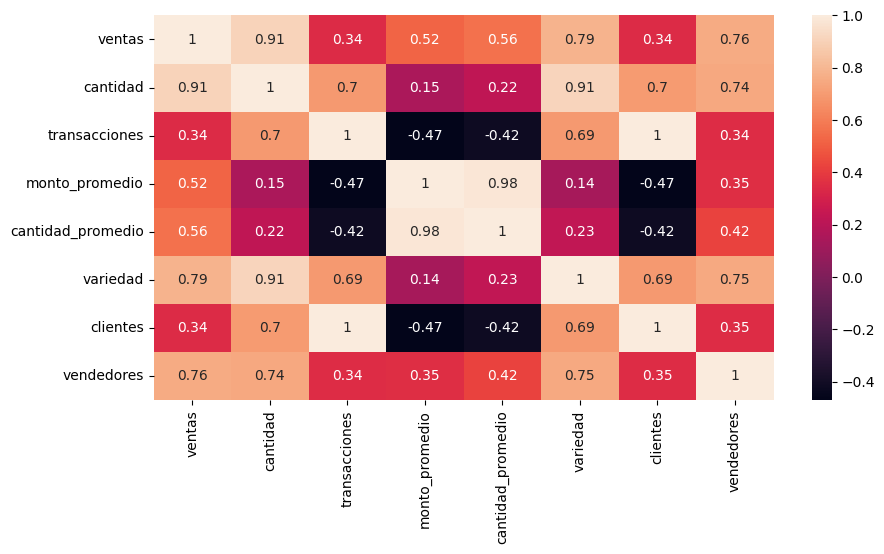

In [24]:
#utilizamos la biblioteca seaborn para crear un mapa de calor (heatmap) a partir de una matriz de correlación.
plt.figure(figsize=(10,5)) #Aquí, se crea una figura (plot) con un tamaño específico. El argumento figsize establece las dimensiones de la figura en pulgadas. 
#En este caso, la figura tendrá 10 pulgadas de ancho y 5 pulgadas de alto.
sns.heatmap(numeric_sales_data[correlation.index].corr(), annot=True)
#Se crea el heatmap utilizando la matriz de correlación de las columnas en numeric_sales_data. 
#La opción annot=True agrega números de correlación en cada celda del heatmap.
plt.show() #mostramos

### - Describa y explique la salida (la matriz de correlación) anterior

Las secciones llamadas iguales "ventas" y "ventas" al coincidir van a dar una correlación de 1, porque son los mismos datos. Por lo demás, cuanto más cerca del 1 o -1, (color más claro, indica más relación entre los datos) más influencia tienen unos datos sobre otros. Los colores rojos y negros no tienen relación suficiente como para que establezcamos que los cambios de uno influye sobre otro. 

Asi pues, a más "cantidad" en la tabla, más "ventas" se han realizado. y a más "vendedores" trabajando, más "ventas" se realizan. Y a más "vendedores", más "cantidad" se vende etc,,,

### Selección de las variables más correlacionadas con las ventas

In [87]:
ventas3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1900-05-01 to 1900-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ventas             38 non-null     float64
 1   cantidad           38 non-null     int64  
 2   transacciones      38 non-null     int64  
 3   monto_promedio     38 non-null     float64
 4   cantidad_promedio  38 non-null     int64  
 5   variedad           38 non-null     int64  
 6   clientes           38 non-null     int64  
 7   vendedores         38 non-null     int64  
 8   año                38 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 3.0 KB


In [89]:
correlation = correlation["ventas"].sort_values(ascending=False)
correlation


ventas               1.000000
cantidad             0.905770
variedad             0.786085
vendedores           0.756155
cantidad_promedio    0.560443
monto_promedio       0.518040
clientes             0.343143
transacciones        0.340578
Name: ventas, dtype: float64

### Explicar el código dado arriba

In [ ]:
#Primero, se toma la columna de correlaciones previamente calculadas (llamada correlation).
#Luego, se selecciona la subserie correspondiente a la columna “ventas” utilizando correlation["ventas"].
#Finalmente, se ordenan los valores de esta subserie en orden descendente mediante sort_values(ascending=False).
#La serie resultante, almacenada en la variable correlation, contiene los coeficientes de correlación entre la columna “ventas” y las demás columnas.
#Los valores están ordenados de mayor a menor, lo que significa que las columnas con una correlación más fuerte con “ventas” aparecerán primero.

### - Visualización gráfica de las variables correlacionadas

### - Explicar linea por línea el siguiente código:

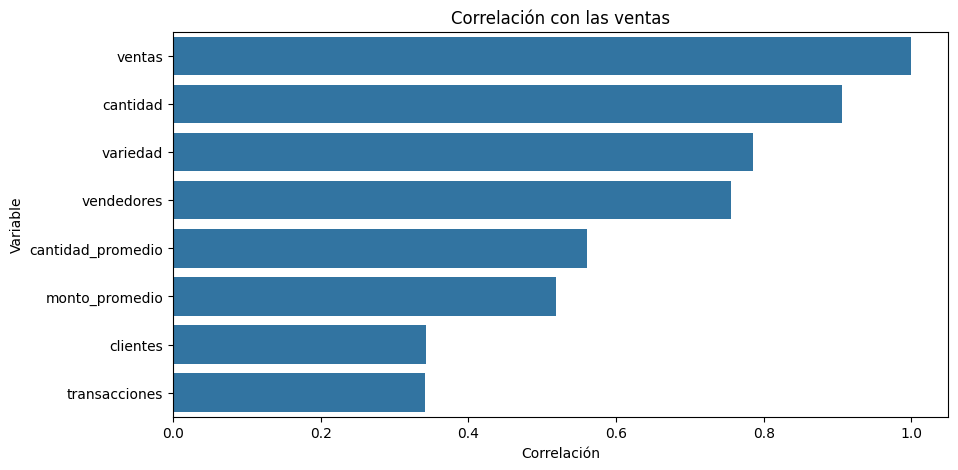

In [26]:
plt.figure(figsize=(10,5)) #creamos plot(figura) con dimensiones 10x5
sns.barplot(x=correlation.values, y=correlation.index) #creamos el grafico tipo "barplot"
#eje x sonlos valores de las correlaciones y el eje y son los nombres de las columnas (que comparamos con la columna "ventas")
plt.title("Correlación con las ventas") #ponemos titulos
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show() #mostramos

### - Interpretar el plot de arriba

La barra de "ventas" alcanza 1 porque es la misma columna que analizamos en el eje x
Y las columnas/valores más relacionados con "ventas" son los valores de "cantidad", "variedad" y "vendedores". Los demás no tienen una relación directa.

### - Seleccionar las variables mas correlacionadas,  esta vez con monto_promedio

In [90]:
ventas3['monto_promedio'] = pd.to_numeric(ventas3['monto_promedio'], errors='coerce')
ventas3

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,año
mes,,,,,,,,,
1900-05-01,8.094970e+06,825,43,188255.1210,19,47,43,9,2011
1900-06-01,5.070965e+05,141,141,3596.4288,1,21,141,1,2011
1900-07-01,2.608142e+07,2209,231,112906.5844,9,51,231,10,2011
1900-08-01,3.800996e+07,2904,250,152039.8384,11,59,250,10,2011
1900-09-01,5.547916e+05,157,157,3533.7045,1,22,157,1,2011
1900-10-01,8.573987e+07,5382,327,262201.4520,16,60,327,10,2011
1900-11-01,8.153130e+05,230,230,3544.8391,1,23,230,1,2011
1900-12-01,1.098031e+07,1040,228,48159.2465,4,51,228,9,2011
1900-01-01,5.743832e+07,3967,336,170947.3956,11,51,336,10,2012


In [91]:

correlation = ventas3['monto_promedio'].sort_values(ascending=False)
correlation


mes
1900-06-01    432681.9233
1900-05-01    406936.2045
1900-07-01    367334.4062
1900-09-01    347458.9105
1900-05-01    299707.4117
1900-10-01    277320.4592
1900-06-01    272955.6301
1900-03-01    268233.9739
1900-08-01    265215.4770
1900-10-01    262201.4520
1900-02-01    250411.7321
1900-04-01    191320.2664
1900-05-01    188255.1210
1900-12-01    174573.7295
1900-01-01    170947.3956
1900-03-01    162084.0672
1900-08-01    152039.8384
1900-01-01    114284.8994
1900-07-01    112906.5844
1900-07-01    110680.0206
1900-11-01    103854.3503
1900-04-01     96881.1956
1900-03-01     89643.2876
1900-02-01     81851.6572
1900-09-01     74829.7700
1900-10-01     69644.4730
1900-05-01     56139.4170
1900-08-01     52330.3384
1900-12-01     48159.2465
1900-12-01     38800.0035
1900-01-01     37471.2788
1900-11-01     25840.0974
1900-06-01      3596.4288
1900-11-01      3544.8391
1900-09-01      3533.7045
1900-04-01      2632.5935
1900-02-01      2331.5993
1900-06-01       155.6441
Name: mo

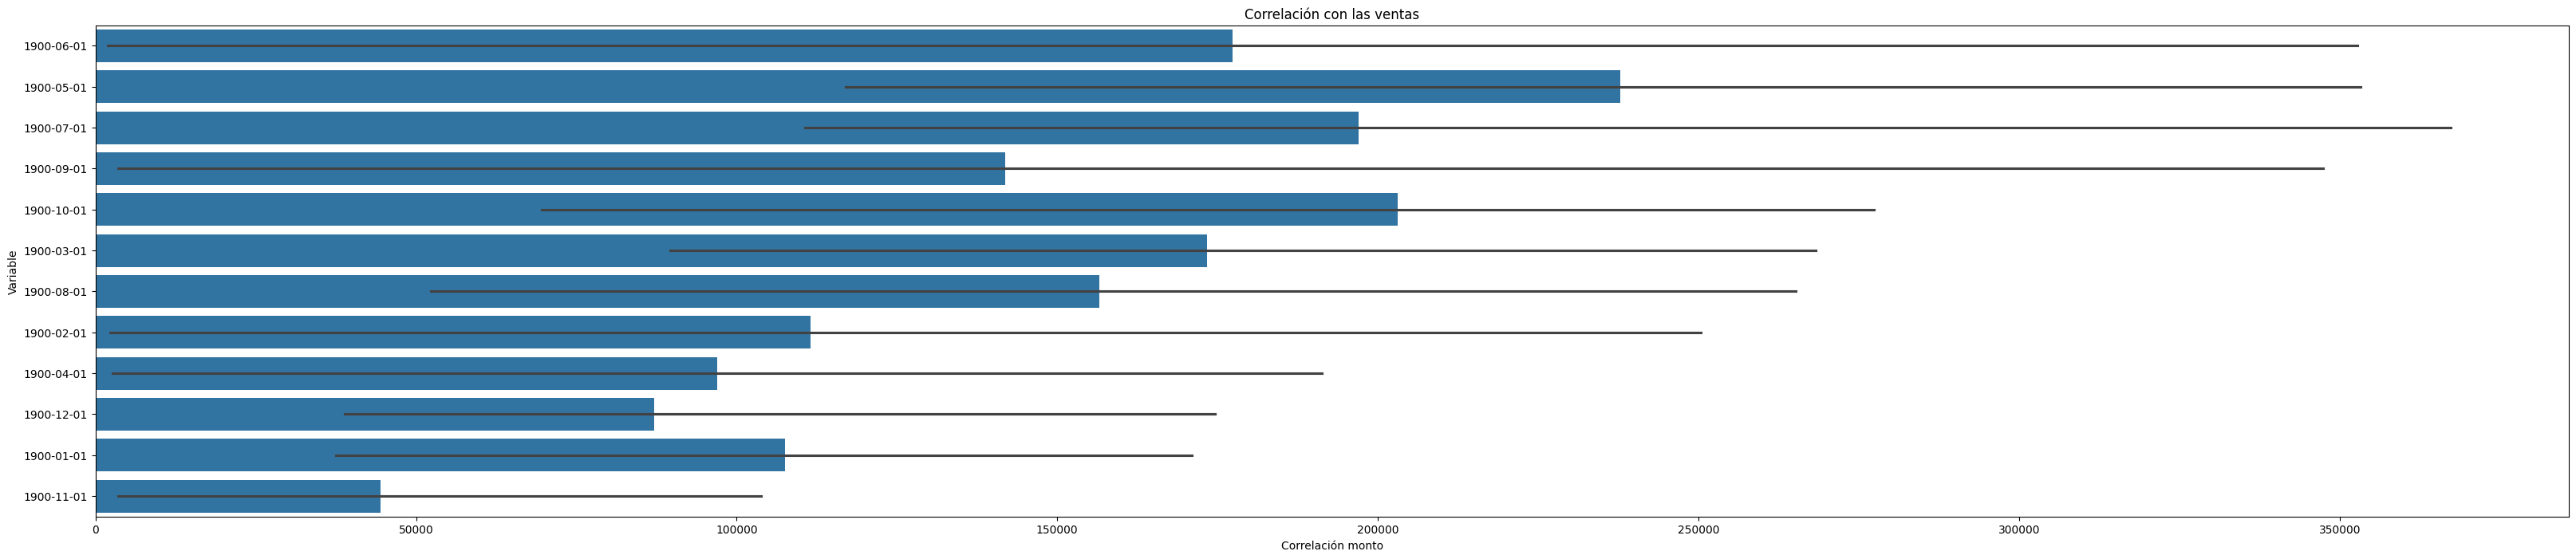

In [92]:
plt.figure(figsize=(40,8)) #creamos plot(figura) con dimensiones 10x5
sns.barplot(x=correlation.values, y=correlation.index) #creamos el grafico tipo "barplot"
#eje x sonlos valores de las correlaciones monto y el eje y son los nombres de las columnas (que comparamos con la columna "monto_promedio")
plt.title("Correlación con las ventas") #ponemos titulos
plt.xlabel("Correlación monto")
plt.ylabel("Variable")
plt.show() #mostramos

### - Visualización gráfica de las variables correlacionadas con monto_promedio

## Pruebas formales para determinar la influencia de cada variable en las ventas

Las pruebas formales se refieren a un conjunto de técnicas estadísticas y matemáticas que se utilizan para validar las hipótesis y afirmaciones hechas sobre los datos en un estudio o análisis.

Asimismo, las pruebas formales son una parte importante del análisis de datos ya que permiten tomar decisiones basadas en evidencia sólida en lugar de basarse únicamente en la intuición o el juicio subjetivo. 

Estas pruebas ayudan a los investigadores a determinar si los patrones o relaciones observados en los datos son estadísticamente significativos o simplemente el resultado del azar.

### - Explicar línea por línea el siguiente código:

In [27]:
influencers = [] #Creas una lista vacía llamada influencers.
for variable in correlation.index: #Bucle: Iteras a través de las variables en el índice de la matriz de correlación.
    p_value, corr = stats.pearsonr(ventas3["ventas"], ventas3[variable])
    if p_value <= 0.05: #Si el valor p (p-value) es menor o igual a 0.05, se considera estadísticamente significativo, y agregas una tupla con el nombre de la variable y su correlación a la lista influencers.
        influencers.append((variable, corr))
    elif p_value > 0.05: #No significativo: Si el valor p es mayor que 0.05, agregas una tupla con el nombre de la variable, su correlación y la etiqueta “No significativo”.
        influencers.append((variable, corr, "No significativo"))

### - Utlizar código de arriba pero tomando como referencia la varible monto_promedio

In [66]:
influencers = [] #Creas una lista vacía llamada influencers.
for variable in correlation.index: #Bucle: Iteras a través de las variables en el índice de la matriz de correlación.
    p_value, corr = stats.pearsonr(ventas3["monto_promedio"], ventas3[variable])
    if p_value <= 0.05: #Si el valor p (p-value) es menor o igual a 0.05, se considera estadísticamente significativo, y agregas una tupla con el nombre de la variable y su correlación a la lista influencers.
        influencers.append((variable, corr))
    elif p_value > 0.05: #No significativo: Si el valor p es mayor que 0.05, agregas una tupla con el nombre de la variable, su correlación y la etiqueta “No significativo”.
        influencers.append((variable, corr, "No significativo"))

KeyError: 13

### Impresión de los resultados

### - Explicar línea por línea el siguiente código:  

In [28]:
print("Variables influyentes en las ventas:") #imprimo esto
for variable, corr, significance in influencers: #si la longitud de "influencers" es mayor que 2,
    if len(influencers) > 2: #es decir, dos variables o más infliyentes, imprime el nombre de la variable y que es significativa o no la correlación
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}") #si hay menos de 3 variables influyentes, solo se imprime elnombre variable y su correlacion

Variables influyentes en las ventas:
ventas: correlación = 0.00 (No significativo)
cantidad: correlación = 0.00 (No significativo)
variedad: correlación = 0.00 (No significativo)
vendedores: correlación = 0.00 (No significativo)
cantidad_promedio: correlación = 0.00 (No significativo)
monto_promedio: correlación = 0.00 (No significativo)
clientes: correlación = 0.03 (No significativo)
transacciones: correlación = 0.04 (No significativo)


Se agregó una comprobación de la hipótesis nula antes de imprimir los resultados de la prueba de correlación. La hipótesis nula establece que no existe una correlación entre las variables, y se rechaza si el **valor p es menor que 0,05**. 

### - Rehacer el código de arriba pero usando monto_promedio

In [68]:
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers:
    if len(influencers) > 2:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}")

Variables influyentes en las ventas:


## Conclusiones

Ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa. En otras palabras, el análisis indica que no hay una relación clara entre las variables y las ventas de la empresa. 

Es importante tener en cuenta que la falta de correlación no necesariamente significa que las variables no son importantes para el negocio, ya que pueden haber otros factores que afecten las ventas que no se están considerando en este análisis. 

Por lo tanto, es necesario realizar más análisis y considerar otros factores para comprender mejor las tendencias de las ventas de la empresa.

## Recomendaciones

A partir de los resultados y las conclusiones de que ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa, se pueden dar las siguientes recomendaciones:

* *Ampliar el análisis*: Es importante considerar que el análisis realizado solo incluyó un conjunto limitado de variables y no consideró otros factores importantes que podrían estar influyendo en las ventas de la empresa. Se recomienda realizar un análisis más amplio e incluir otras variables relevantes que puedan tener un impacto en las ventas, como la satisfacción del cliente, la calidad de los productos, la competencia en el mercado, entre otros.

* *Realizar encuestas a los clientes*: Realizar encuestas a los clientes puede ser una buena manera de obtener información sobre los factores que los motivan a comprar y los aspectos que consideran importantes al momento de realizar una compra. Esta información puede ayudar a la empresa a identificar áreas de oportunidad y mejorar su estrategia de ventas.

* *Realizar análisis de la competencia*: Analizar a la competencia puede ser útil para entender mejor el mercado y conocer las tendencias del mismo. Además, puede ayudar a la empresa a identificar estrategias exitosas de la competencia que puedan ser aplicables a su negocio.

* *Implementar estrategias de marketing*: Aunque las variables analizadas no mostraron una correlación significativa con las ventas, implementar estrategias de marketing puede ser útil para incrementar la exposición de la empresa y atraer a nuevos clientes. Las estrategias de marketing pueden incluir publicidad en línea, redes sociales, promociones y descuentos, entre otros.

# EXTRA:
v22= pd.read_bak("AdventureWorks2019")

read_bak no existe en panda. Para que me lea una base de datos .bak o cualquiera, tengo que pasar la base de datos a SQL y ahÍ ya pandas sí puede leerla completa.